## AMAN SAINI - 19CSU020
## ABHYUDAYA  - 19CSU010
## AMANDEEP   - 19CSU023

# ACS PROJECT

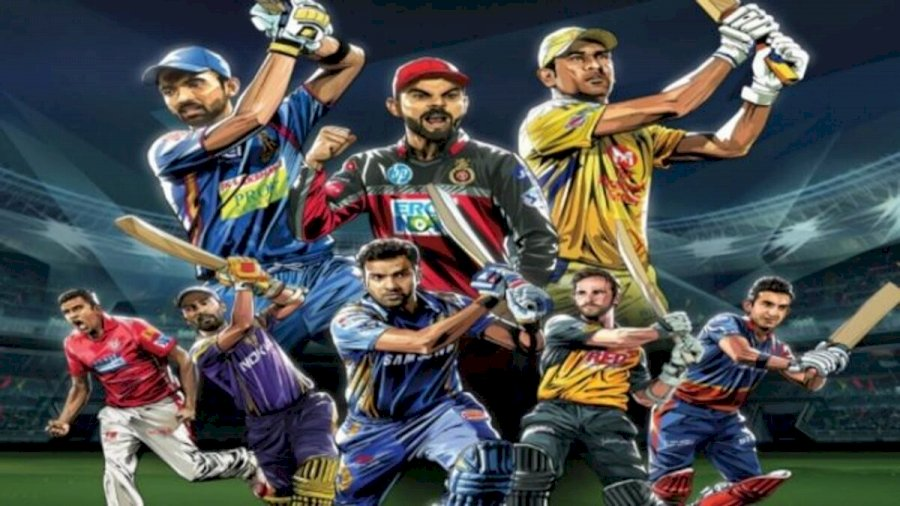

## Let's visualize the data set on ipl teams and their performance stats.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy.stats import zscore

In [ ]:
matches_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")

In [ ]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [ ]:
score_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [ ]:
print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

# 7 Most Played venue in the History of IPL from 2008 to 2017

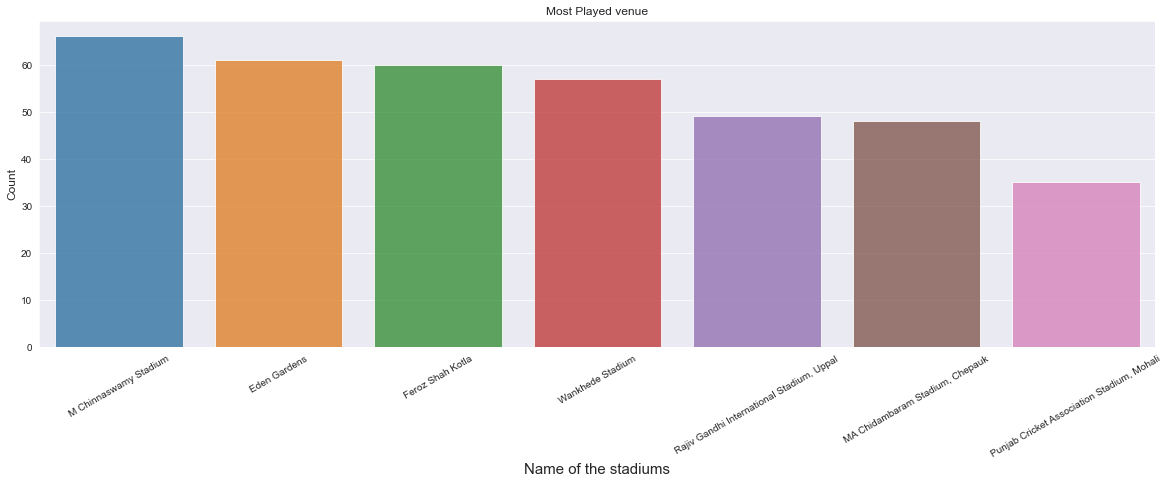

In [ ]:
ls=matches_df['venue'].value_counts().sort_values(ascending=False)
ls=ls[:7]
plt.figure(figsize=(20,6))
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()


# Most Player of the Matches across 9 Seasons

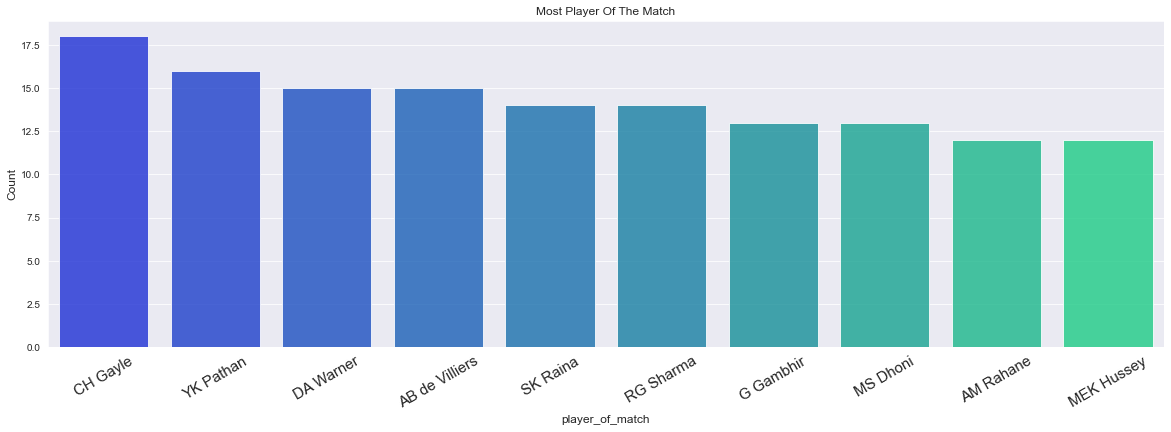

In [ ]:
man_of_match=matches_df['player_of_match'].value_counts()
man_of_match=man_of_match[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
man_of_matches=sns.barplot(man_of_match.index, man_of_match.values, alpha=0.8,palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)
man_of_matches.set_xticklabels(rotation=30,labels=man_of_match.index,fontsize=15)
plt.show()

# Matches Played across each season

Text(0.5, 0, 'Season')

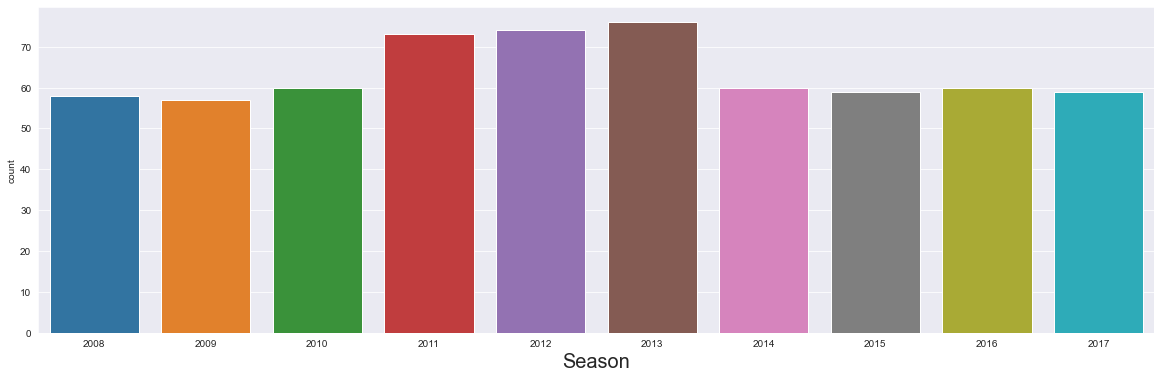

In [ ]:
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=matches_df)
plt.xlabel('Season',fontsize=20)

### Team won by Maximum Wickets

In [ ]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### Team won by minimum runs

In [ ]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### Team won by Minimum Wickets

In [ ]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

### Top Player of the match winners

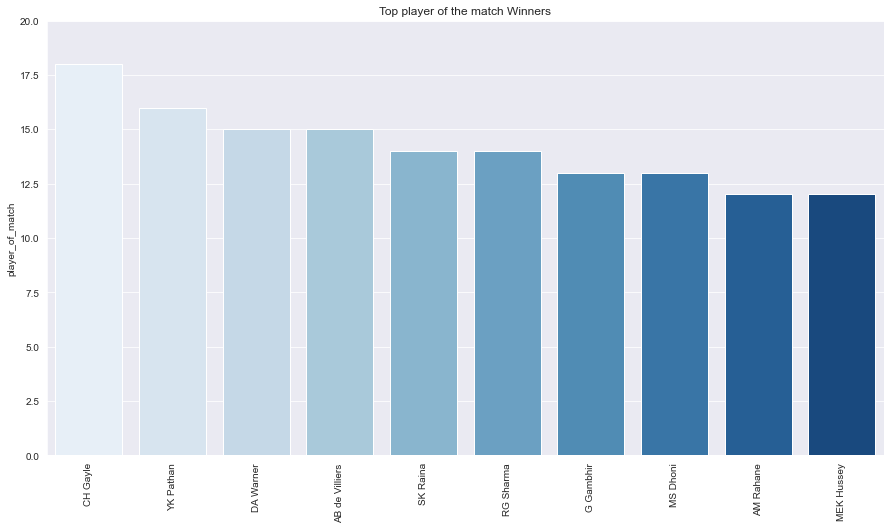

In [ ]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

### Number of matches in each venue:

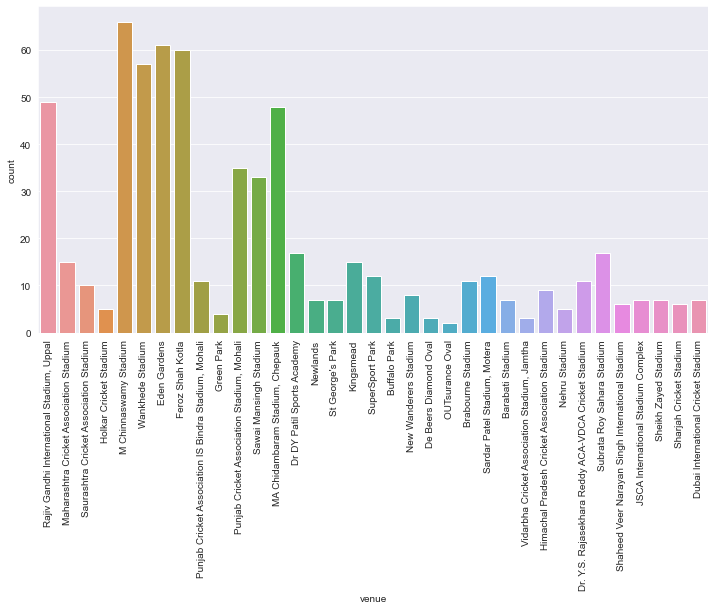

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

# Stadium Wise Analysis for Most Played 6 Venues

## Feroz Shah Kotla

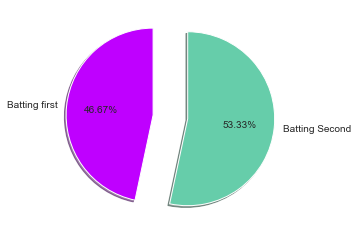

In [ ]:
Delhi_stadium=matches_df.loc[(matches_df['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])
plt.show()

## Eden Gardens

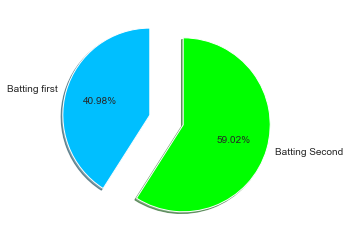

In [ ]:
Kolkata_stadium=matches_df.loc[(matches_df['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

## Wankhede Stadium

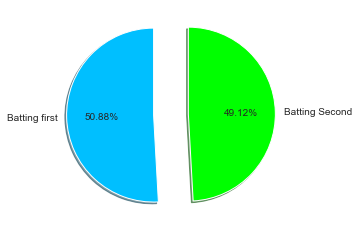

In [ ]:
Mumbai_stadium=matches_df.loc[(matches_df['venue']=='Wankhede Stadium') ]
Mumbai_stadium_win_by_runs=Mumbai_stadium[Mumbai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Mumbai_stadium_win_by_runs),len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

## M Chinnaswamy Stadium

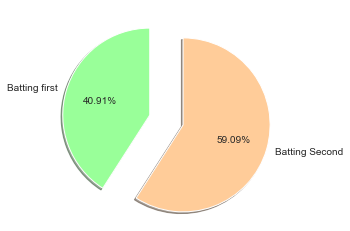

In [ ]:
M_Chinnaswamy_Stadium=matches_df.loc[(matches_df['venue']=='M Chinnaswamy Stadium') ]
M_Chinnaswamy_Stadium_win_by_runs=M_Chinnaswamy_Stadium[M_Chinnaswamy_Stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(M_Chinnaswamy_Stadium_win_by_runs),len(M_Chinnaswamy_Stadium)-len(M_Chinnaswamy_Stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

## MA Chidambaram Stadium, Chepauk

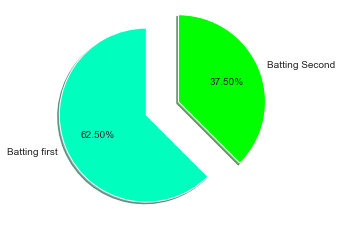

In [ ]:
Chennai_stadium=matches_df.loc[(matches_df['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00ffbf','#00ff00'])
plt.show()

## Most Favourite Umpires

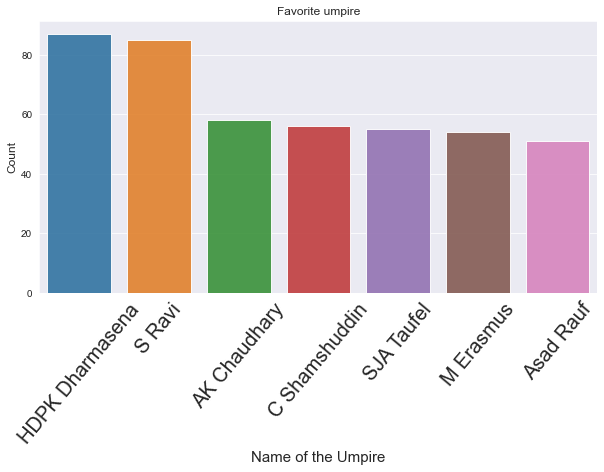

In [ ]:
ump=pd.concat([matches_df['umpire1'],matches_df['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:7]
plt.figure(figsize=(10,5))
Most_umpired =sns.barplot(x=ump.index, y=ump.values, alpha=0.9)

plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=50,labels=ump.index,fontsize=20)
plt.show()

## Batsman with higest percentage of dot balls

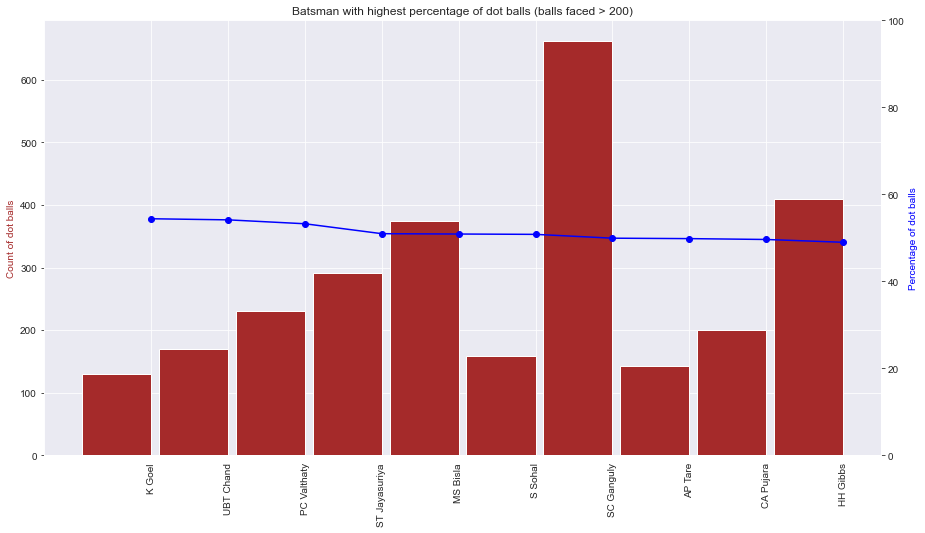

In [ ]:
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = score_df.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

## Run rate across seasons

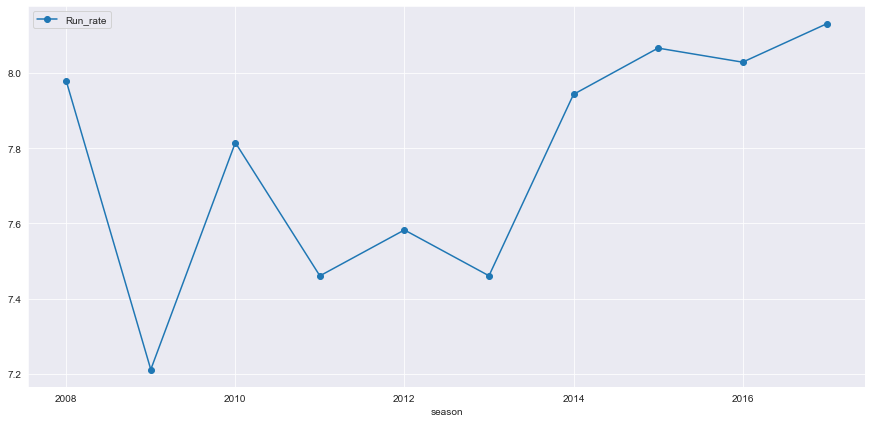

In [ ]:
mergeddata=matches_df.merge(score_df,left_on='id', right_on='match_id', how='left')
merge2=mergeddata.groupby(['season']).sum().sort_values(by=['season','match_id'])
totl_runs_acrs_season=merge2['total_runs'] 
merge3=mergeddata.groupby(['season']).count().sort_values(by=['season','match_id'])
totl_balls_acrs_season= merge3['ball'] 
Run_rate_across_season=(totl_runs_acrs_season/(totl_balls_acrs_season/6)).reset_index().rename({0:'Run_rate'}, axis='columns')
Run_rate_across_season.set_index('season').plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.show()

## Most dismissal Batsman vs Bowler

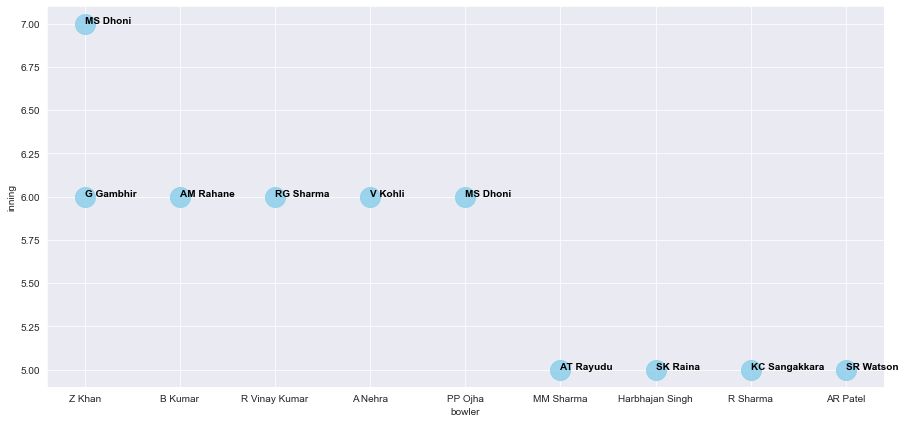

In [ ]:
deliveries_data_dismissal=score_df['dismissal_kind'].dropna()
most_dismissal_bowler=dismissal_bowler_tot.groupby(['bowler','batsman']).count().sort_values(by='inning',ascending=False)[0:10]
most_dis=most_dismissal_bowler['inning'].reset_index()
plt.figure(figsize=(15, 7))
out1=sns.regplot(data=most_dis, x="bowler", y="inning", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
for line in range(0,most_dis.shape[0]):
    out1.text(most_dis.bowler[line], most_dis.inning[line], most_dis.batsman[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

## Top 10 batsman vs bowler favourite

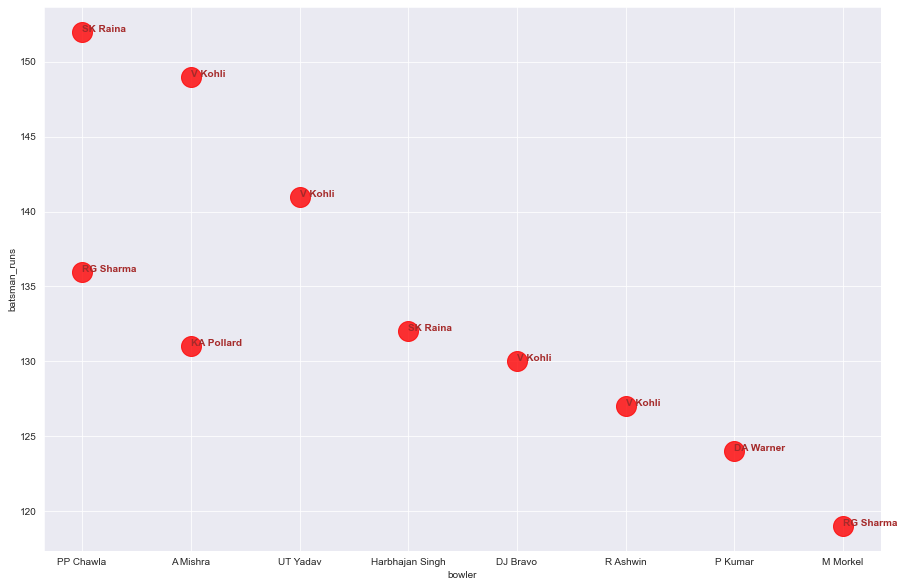

In [ ]:
batsman_bowler_comb=score_df.groupby(['batsman','bowler']).sum().sort_values(by=['batsman_runs'], ascending=False)[:10]
batsman_bowler_fav=batsman_bowler_comb['batsman_runs'].reset_index()
plt.figure(figsize=(15, 10))
out3=sns.regplot(data=batsman_bowler_fav, x='bowler',y='batsman_runs', fit_reg=False, marker='o', color='red', scatter_kws={'s':400})
for fav_val in range(0,batsman_bowler_fav.shape[0]):
    out3.text(batsman_bowler_fav.bowler[fav_val],batsman_bowler_fav.batsman_runs[fav_val],batsman_bowler_fav.batsman[fav_val], horizontalalignment='left', size='medium', color='brown', weight='semibold')
plt.show()